# EXPLORATORY DATA ANALYSIS

In [2]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt 
from datasets import load_dataset
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() #It stores data as data sets, we converted it to dataframe

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)



In [25]:
import seaborn as sns
pd.set_option('display.max_rows', 100) 
df_DA_IN= df.loc[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

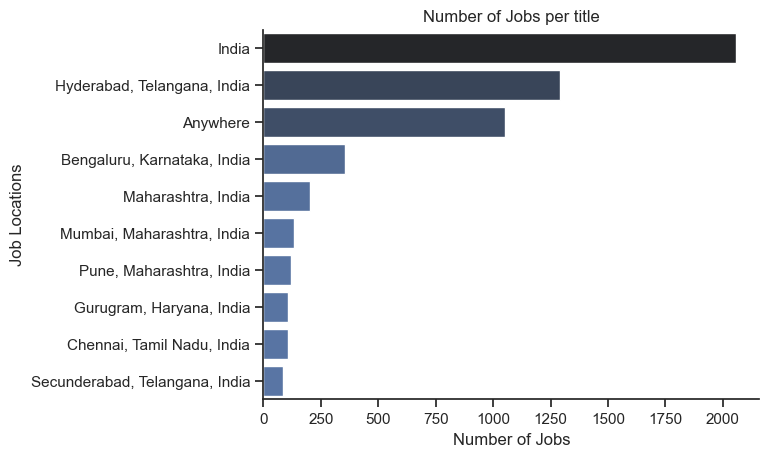

In [37]:
df_plot=df_DA_IN['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,y='job_location',x='count',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Jobs per title')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Locations')
plt.show()

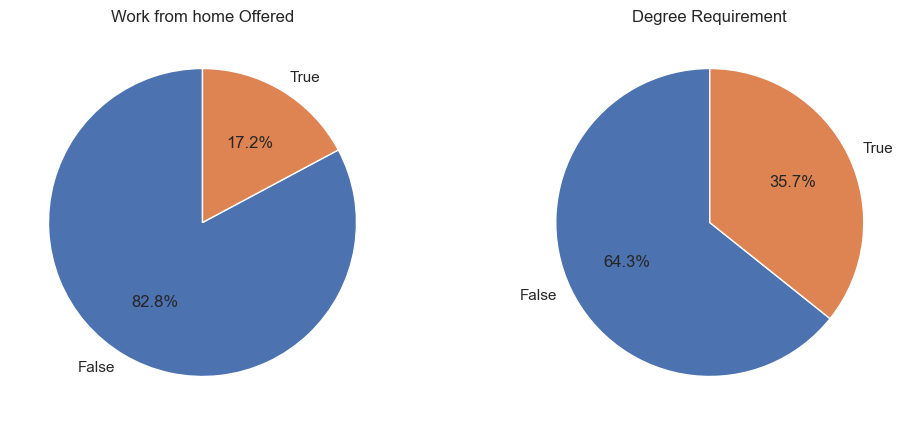

In [75]:
dict_column={'job_work_from_home':'Work from home Offered',
            'job_no_degree_mention':'Degree Requirement'}
fig,ax=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((12,5))

for i,(columns,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_IN[columns].value_counts(),labels=['False','True'],autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)
plt.show()

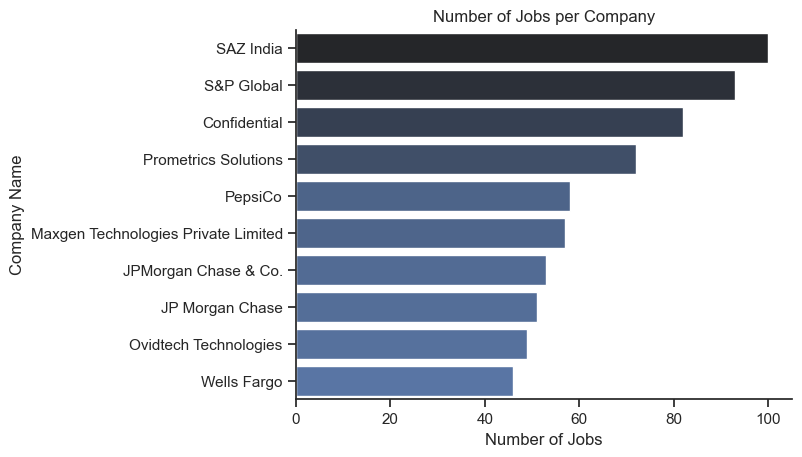

In [83]:
df_plot=df_DA_IN['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,y='company_name',x='count',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('Company Name')
plt.show()